In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
%matplotlib notebook
import pandas as pd
import astropy
from astropy import cosmology
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from astropy.coordinates import SkyCoord
cosmo = FlatLambdaCDM(H0=100 * u.km / u.s / u.Mpc, Om0=0.3)
import pvhub
import pycf3
c = 299792.458

In [2]:
import sys
print (sys.version)

3.8.3 (default, May 19 2020, 13:54:14) 
[Clang 10.0.0 ]


In [3]:
Lania = pd.read_csv("Laniakia_positions.csv")
Lania

,sgx,sgy,sgz
0,-1882.60,501.715,-6086.52
1,-1757.11,501.715,-6086.52
2,-1631.62,501.715,-6086.52
3,-1506.13,501.715,-6086.52
4,-1380.64,501.715,-6086.52
...,...,...,...
75001,-2259.07,-2635.540,14117.40
75002,-2133.58,-2635.540,14117.40
75003,-2008.09,-2635.540,14117.40
75004,-1882.60,-2635.540,14117.40


In [4]:
ind = pd.read_csv("Laniakia_index.csv")
#ind = ind[:50000]
ind

,i,j,k
0,154,130,1
1,130,131,2
2,130,2,1
3,131,132,3
4,131,3,2
...,...,...,...
149999,74928,75005,75004
150000,74928,75004,74927
150001,74929,75006,75005
150002,74929,75005,74928


In [5]:
print (Lania.sgx)

0       -1882.60
1       -1757.11
2       -1631.62
3       -1506.13
4       -1380.64
          ...   
75001   -2259.07
75002   -2133.58
75003   -2008.09
75004   -1882.60
75005   -1757.11
Name: sgx, Length: 75006, dtype: float64


In [6]:
print (ind.i)

0           154
1           130
2           130
3           131
4           131
          ...  
149999    74928
150000    74928
150001    74929
150002    74929
150003    75006
Name: i, Length: 150004, dtype: int64


In [7]:
x = []; y =[]; z = []
for i in ind.i:
    #print (Lania.sgx[i-1])
    x.append(Lania.sgx[i-1])
for j in ind.j:
    y.append(Lania.sgy[j-1])
for k in ind.k:
    z.append(Lania.sgz[k-1])
    

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Lania.sgx, Lania.sgy, Lania.sgz,s=0.01)

# Set an equal aspect ratio
#ax.set_aspect('equal')

plt.show()

<IPython.core.display.Javascript object>

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z,s=0.01)

# Set an equal aspect ratio
#ax.set_aspect('equal')

plt.show()

<IPython.core.display.Javascript object>

In [10]:
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# # x = [Lania.sgx[ind.i]]
# # y = [Lania.sgy[129],Lania.sgy[130],Lania.sgy[1],Lania.sgy[131]]
# # z = [Lania.sgz[0],Lania.sgz[1],Lania.sgz[0],Lania.sgz[2]]
# ax.plot(x, y, z)

# # Set an equal aspect ratio
# #ax.set_aspect('equal')

# plt.show()

In [11]:
# fig = plt.figure()
# ax = Axes3D(fig)#, auto_add_to_figure=False)
# fig.add_axes(ax)
# ax.set_xlim(-10000,5000)
# ax.set_ylim(-7500,5000)
# ax.set_zlim(-5000,10000)
# # x = [Lania.sgx[153],Lania.sgx[129],Lania.sgx[129],Lania.sgx[130]]
# # y = [Lania.sgy[129],Lania.sgy[130],Lania.sgy[1],Lania.sgy[131]]
# # z = [Lania.sgz[0],Lania.sgz[1],Lania.sgz[0],Lania.sgz[2]]
# verts = [list(zip(x,y,z))]
# ax.add_collection3d(Poly3DCollection(verts))
# plt.show()

In [12]:
lan_super = SkyCoord(sgx=Lania.sgx,sgy=Lania.sgy,sgz=Lania.sgz,frame='supergalactic',representation_type = 'cartesian', unit='km/s')
lan_super

<SkyCoord (Supergalactic): (sgx, sgy, sgz) in km / s
    [(-1882.6 ,   501.715, -6086.52), (-1757.11,   501.715, -6086.52),
     (-1631.62,   501.715, -6086.52), ..., (-2008.09, -2635.54 , 14117.4 ),
     (-1882.6 , -2635.54 , 14117.4 ), (-1757.11, -2635.54 , 14117.4 )]>

In [13]:
lan_icrs = lan_super.transform_to('icrs')
lan_icrs


<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, km / s)
    [(117.01703142, -28.56098179,  6390.74537215),
     (116.39234025, -27.63066929,  6354.90985017),
     (115.77150979, -26.68734841,  6321.3627863 ), ...,
     (289.56607643,   3.80174534, 14501.01649195),
     (289.79887224,   4.23507325, 14484.17193393),
     (290.0324547 ,   4.66930819, 14468.39622777)]>

In [14]:
# #test
# ccc = SkyCoord(lan_icrs.ra, lan_icrs.dec, frame='icrs', unit='deg')
# x001 = ccc.transform_to('galactic')
# c00 = SkyCoord(l=x001.l.value*u.degree, b=x001.b.value*u.degree, distance=lan_icrs.distance, frame='galactic')
# c01 = c00.transform_to('supergalactic')
# c01.representation_type = 'cartesian'
# c01

In [15]:
lan_gal = lan_super.transform_to('galactic')
lan_gal

<SkyCoord (Galactic): (l, b, distance) in (deg, deg, km / s)
    [(244.50883934, -1.53637405,  6390.74537215),
     (243.42720803, -1.5450398 ,  6354.90985017),
     (242.33369474, -1.55324123,  6321.3627863 ), ...,
     ( 39.38842925, -4.21360187, 14501.01649195),
     ( 39.88136921, -4.218511  , 14484.17193393),
     ( 40.37542663, -4.22311902, 14468.39622777)]>

In [16]:
lani_galactic = pd.DataFrame(np.column_stack((lan_gal.l.value,lan_gal.b.value,lan_gal.distance.value)),columns=['l','b','cz'])
#lani_galactic
lani_galactic.to_csv('lan_galactic.csv',sep=' ',index=False,header=True)

In [17]:
lani_icrs = pd.DataFrame(np.column_stack((lan_icrs.ra.value,lan_icrs.dec.value,lan_icrs.distance.value/c)),columns=['RA','DEC','zcmb'])
lani_icrs
lani_icrs.to_csv('lan_icrs.csv',index=False,header=True)

In [18]:
ra = lan_icrs.ra.value
dec = lan_icrs.dec.value
zcmb = lan_icrs.distance.value/c

In [19]:
pv = pvhub.calculate_pv(ra, dec, zcmb)

No model specified with choose_model(); will load default model.
Loading model 0 (2M++_SDSS)


In [20]:
pv

array([93., 93., 86., ..., 63., 63., 63.])

In [21]:
np.mean(pv)

17.012465669413114

In [22]:
print (len(lan_gal.distance.value))

75006


In [26]:
cf3 = pycf3.CF3()
obs_v = []; obs_dist = []; adj_dist = [];pv_cf3 = []
for i in range(9000):
    result = cf3.calculate_distance(velocity=lan_gal.distance.value[i], glon=lan_gal.l.value[i], glat=lan_gal.b.value[i])
    obs_v.append((round(result.observed_velocity_,3)))
    obs_dist.append(round(float(result.observed_distance_),3))
    adj_dist.append(round(float(result.adjusted_distance_),3))
    pv_cf3.append(round(float(result.observed_velocity_) - float(result.observed_distance_)*75.0,3))
    print (i,int(result.observed_velocity_), round(float(result.observed_distance_),3) , round(float(result.adjusted_distance_),3))

0 6390 89.306 88.058
1 6354 88.749 87.517
2 6321 88.311 87.032
3 6290 87.802 86.457
4 6261 87.286 85.949
5 6234 86.837 85.502
6 6210 86.47 84.993
7 6189 85.952 84.444
8 6439 90.287 88.949
9 6401 89.744 88.399
10 6366 89.174 87.882
11 6332 88.733 87.386
12 6301 88.256 86.865
13 6272 87.719 86.337
14 6246 87.288 85.907
15 6222 86.897 85.455
16 6200 86.461 84.926
17 6181 86.05 84.487
18 6453 90.794 89.429
19 6415 90.361 88.958
20 6379 89.867 88.468
21 6346 89.319 87.915
22 6315 88.848 87.438
23 6286 88.457 87.038
24 6260 87.993 86.539
25 6236 87.494 86.04
26 6214 87.164 85.647
27 6195 86.865 85.314
28 6178 86.423 84.906
29 6469 91.193 89.82
30 6431 90.752 89.396
31 6395 90.205 88.854
32 6362 89.717 88.359
33 6331 89.303 87.914
34 6302 88.84 87.453
35 6276 88.4 87.022
36 6252 88.0 86.486
37 6230 87.644 86.128
38 6212 87.307 85.755
39 6195 86.942 85.417
40 6487 91.687 90.339
41 6449 91.17 89.798
42 6414 90.592 89.259
43 6380 90.175 88.847
44 6349 89.78 88.384
45 6321 89.232 87.854
46 6295 8

378 6522 95.188 93.693
379 6496 94.784 93.285
380 6473 94.414 92.939
381 6453 93.998 92.475
382 6434 93.623 92.13
383 6418 93.333 91.812
384 6405 92.93 91.428
385 6624 96.548 95.142
386 6594 96.298 94.854
387 6566 96.062 94.53
388 6541 95.733 94.154
389 6518 95.34 93.788
390 6498 95.032 93.423
391 6479 94.767 93.06
392 6464 94.401 92.72
393 6613 96.944 95.383
394 6588 96.558 95.006
395 6565 96.179 94.663
396 6545 95.958 94.394
397 6387 88.029 86.633
398 6341 87.362 85.95
399 6297 86.649 85.304
400 6256 85.796 84.497
401 6425 88.638 87.275
402 6207 85.001 83.692
403 6170 84.418 83.135
404 6135 83.804 82.553
405 6467 89.288 87.931
406 6095 83.025 81.934
407 6065 82.39 81.34
408 6033 82.597 81.37
409 6008 82.052 80.861
410 5986 81.587 80.417
411 6512 90.59 89.093
412 5963 81.402 80.178
413 5946 81.155 80.009
414 6563 92.664 91.317
415 5987 83.642 82.342
416 6569 93.498 92.232
417 6570 93.868 92.557
418 6583 94.66 93.48
419 6157 88.048 86.69
420 6572 94.773 93.627
421 6566 94.905 93.72
422

778 6050 86.624 85.309
779 6644 95.838 94.565
780 6087 87.311 85.904
781 6631 95.961 94.607
782 6127 88.469 87.048
783 6623 96.004 94.719
784 6169 89.279 87.912
785 6619 96.208 95.116
786 6214 90.057 88.602
787 6620 96.369 95.22
788 6261 91.169 89.576
789 6626 96.622 95.452
790 6319 92.378 90.901
791 6637 96.985 95.831
792 6383 93.712 92.244
793 6619 97.069 95.947
794 6467 95.198 93.767
795 6529 89.161 88.188
796 6480 88.535 87.546
797 6432 87.931 87.079
798 6387 87.286 86.411
799 6343 86.632 85.666
800 6549 89.487 88.559
801 6497 88.818 87.804
802 6447 88.185 87.152
803 6399 87.554 86.575
804 6353 86.907 85.96
805 6310 86.251 85.227
806 6268 85.606 84.585
807 6229 85.013 84.097
808 6573 89.871 88.979
809 6518 89.266 88.383
810 6466 88.56 87.604
811 6416 87.9 86.912
812 6368 87.286 86.39
813 6322 86.637 85.768
814 6278 85.94 84.976
815 6237 85.248 84.275
816 6198 84.636 83.774
817 6161 84.042 83.164
818 6601 90.089 89.187
819 6545 89.644 88.765
820 6491 88.915 88.169
821 6438 88.227 87

1157 6562 90.099 89.006
1158 6508 89.584 88.302
1159 6455 88.842 87.547
1160 6405 87.999 86.946
1161 6357 87.554 86.416
1162 6311 87.027 85.781
1163 6267 86.221 85.065
1164 6226 85.504 84.399
1165 6186 85.091 83.876
1166 6149 84.495 83.287
1167 6115 83.783 82.628
1168 6082 83.239 82.019
1169 6702 91.389 89.854
1170 6642 90.58 89.136
1171 6583 89.93 88.845
1172 6527 89.672 88.521
1173 6472 89.161 87.861
1174 6189 85.081 83.972
1175 6149 84.596 83.401
1176 6112 84.045 82.825
1177 6077 83.273 82.151
1178 6045 82.733 81.549
1179 6015 82.3 81.056
1180 6670 91.009 89.713
1181 6610 90.262 89.04
1182 6551 89.584 88.523
1183 6494 89.149 88.089
1184 6077 83.406 82.307
1185 6042 82.675 81.643
1186 6009 82.116 81.063
1187 5979 81.694 80.536
1188 5951 81.113 80.064
1189 5926 80.571 79.566
1190 6703 91.433 90.334
1191 6640 90.981 89.689
1192 6580 90.214 88.89
1193 6521 89.404 88.348
1194 6009 82.287 81.236
1195 5976 81.689 80.555
1196 5946 81.245 80.054
1197 5918 80.701 79.589
1198 5893 80.175 79.09

1540 6084 83.551 82.504
1541 6051 83.077 81.9
1542 6021 82.542 81.361
1543 5994 82.086 80.992
1544 5969 81.657 80.616
1545 6731 91.534 90.309
1546 6669 90.879 89.56
1547 6608 90.1 88.932
1548 6008 82.402 81.284
1549 5978 81.869 80.684
1550 5950 81.416 80.329
1551 5925 81.005 79.949
1552 6759 91.326 90.33
1553 6695 91.15 89.862
1554 6632 90.469 88.976
1555 5937 81.26 80.019
1556 5909 80.794 79.664
1557 5884 80.34 79.244
1558 5861 79.797 78.691
1559 6792 91.47 90.498
1560 6725 90.956 90.068
1561 6661 90.745 89.519
1562 5870 80.293 79.204
1563 5845 79.827 78.825
1564 5822 79.305 78.233
1565 6760 91.482 90.438
1566 6694 90.942 89.897
1567 6629 90.457 89.363
1568 5785 78.855 77.887
1569 6800 92.145 90.777
1570 6731 91.272 89.988
1571 6664 90.646 89.576
1572 5751 78.275 77.224
1573 5730 77.849 76.833
1574 6844 92.553 91.333
1575 6773 91.789 90.403
1576 6704 90.862 89.638
1577 5699 77.402 76.373
1578 6819 92.354 91.19
1579 6749 91.543 90.255
1580 6680 90.644 89.541
1581 5670 77.05 76.077
1582

1923 5901 80.943 80.078
1924 5878 80.426 79.616
1925 5858 79.978 79.266
1926 6800 92.058 91.095
1927 6734 91.387 90.435
1928 6669 90.839 89.867
1929 5831 79.9 79.045
1930 5811 79.489 78.652
1931 6830 92.45 91.535
1932 6762 91.676 90.763
1933 6695 91.023 90.08
1934 5786 79.275 78.416
1935 5766 78.817 77.986
1936 5748 78.601 77.731
1937 6864 92.808 91.952
1938 6794 91.998 91.23
1939 6725 91.126 90.335
1940 5723 78.057 77.411
1941 5706 77.867 77.104
1942 6831 92.458 91.5
1943 6760 91.626 90.769
1944 5683 77.597 76.877
1945 5665 77.352 76.58
1946 5650 77.015 76.27
1947 6872 92.861 91.808
1948 6800 92.173 91.156
1949 6729 91.389 90.397
1950 5646 77.17 76.403
1951 5628 76.896 76.077
1952 5612 76.561 75.734
1953 6844 92.577 91.583
1954 6771 91.92 90.958
1955 5593 76.348 75.569
1956 5577 75.957 75.21
1957 5564 75.566 74.9
1958 6892 93.103 92.213
1959 6817 92.226 91.331
1960 5560 75.814 75.12
1961 5545 75.433 74.743
1962 5532 75.019 74.471
1963 6868 92.866 91.945
1964 6793 92.073 91.114
1965 55

2306 6765 92.04 90.914
2307 5847 80.611 79.734
2308 6854 93.292 92.134
2309 6786 92.49 91.247
2310 6882 93.36 92.274
2311 6811 92.826 91.607
2312 6743 92.058 90.733
2313 5726 78.882 78.116
2314 6841 92.78 91.691
2315 6771 92.174 91.082
2316 5678 78.204 77.361
2317 6876 93.129 91.928
2318 6803 92.444 91.467
2319 5616 77.218 76.377
2320 6915 93.859 92.299
2321 6840 92.842 91.542
2322 5573 76.627 75.892
2323 6882 93.372 91.895
2324 6807 92.41 91.157
2325 5519 75.84 75.165
2326 6927 93.819 92.591
2327 6851 93.034 91.748
2328 5480 75.199 74.445
2329 6977 94.483 93.33
2330 6899 93.76 92.631
2331 6822 92.966 91.724
2332 5434 74.41 73.671
2333 6951 94.323 93.123
2334 6872 93.588 92.37
2335 5401 74.014 73.289
2336 6927 94.047 92.786
2337 6848 93.252 92.026
2338 5370 73.52 72.842
2339 6986 95.0 93.635
2340 6906 93.953 92.737
2341 5342 73.065 72.301
2342 5335 72.81 72.034
2343 6967 95.114 93.724
2344 6886 93.944 92.756
2345 5317 72.796 72.111
2346 5309 72.495 71.77
2347 6950 95.002 93.557
2348 68

2688 6912 93.652 92.581
2689 5351 73.863 72.964
2690 7047 95.562 93.857
2691 6965 94.492 92.965
2692 7021 95.235 93.506
2693 6939 94.138 92.636
2694 5272 72.499 71.62
2695 6997 94.93 93.364
2696 6915 93.873 92.554
2697 5241 72.0 71.206
2698 7060 96.134 94.707
2699 6976 95.145 93.692
2700 5208 71.427 70.617
2701 7041 96.247 94.682
2702 6957 95.276 93.613
2703 5182 71.115 70.236
2704 7024 96.132 94.476
2705 6940 95.087 93.379
2706 5159 70.875 69.961
2707 7010 95.982 94.447
2708 5139 70.536 69.747
2709 5138 70.427 69.566
2710 6997 96.165 94.751
2711 5122 70.408 69.652
2712 5121 70.32 69.485
2713 6987 96.374 94.81
2714 5113 70.543 69.765
2715 5108 70.38 69.536
2716 5107 70.245 69.337
2717 7066 97.598 95.877
2718 6979 96.36 94.756
2719 5102 70.437 69.663
2720 5098 70.267 69.417
2721 7060 97.65 96.025
2722 6974 96.443 94.884
2723 5095 70.356 69.584
2724 6970 96.765 95.289
2725 5090 70.494 69.746
2726 6969 97.022 95.455
2727 5096 70.998 70.164
2728 5088 70.668 69.869
2729 6970 97.095 95.542
2

3039 6902 93.152 92.18
3040 6929 93.568 92.47
3041 6855 92.854 91.771
3042 5607 77.981 77.007
3043 6961 93.95 92.767
3044 6885 92.934 91.828
3045 6997 94.382 93.298
3046 6919 93.458 92.315
3047 5483 76.214 75.18
3048 7038 94.823 93.743
3049 6958 94.083 92.94
3050 7001 94.497 93.379
3051 6920 93.76 92.609
3052 5371 74.489 73.502
3053 7048 94.841 93.762
3054 6966 93.898 92.915
3055 7015 94.539 93.492
3056 6933 93.609 92.633
3057 5272 73.0 72.036
3058 7069 95.746 94.441
3059 6985 94.53 93.397
3060 7041 95.586 94.179
3061 5186 71.604 70.811
3062 7101 96.276 95.038
3063 7015 95.227 93.858
3064 7078 96.188 94.944
3065 6992 95.133 93.766
3066 5115 70.434 69.636
3067 7057 96.319 94.945
3068 7126 97.433 95.827
3069 7038 96.276 94.81
3070 5057 69.314 68.516
3071 7109 97.201 95.653
3072 7021 96.064 94.692
3073 5034 69.011 68.189
3074 7095 97.154 95.73
3075 7006 96.073 94.75
3076 7082 97.673 95.998
3077 6994 96.46 94.904
3078 4998 68.71 68.019
3079 7072 97.653 95.903
3080 6984 96.469 94.837
3081 4

3394 6278 87.253 86.013
3395 6995 94.974 93.745
3396 6933 94.523 93.34
3397 6995 94.92 93.628
3398 6931 94.221 93.006
3399 7000 94.885 93.817
3400 6933 94.202 93.033
3401 6008 83.761 82.625
3402 6940 94.238 93.209
3403 6872 93.406 92.339
3404 6951 94.183 93.088
3405 6882 93.506 92.437
3406 5847 81.536 80.435
3407 6967 94.224 93.08
3408 6895 93.563 92.493
3409 6987 94.571 93.49
3410 6914 93.681 92.597
3411 5696 79.35 78.299
3412 7012 94.908 93.901
3413 6936 94.025 92.982
3414 7041 95.093 93.947
3415 6963 94.295 93.207
3416 5554 77.337 76.417
3417 6995 94.672 93.588
3418 6917 93.852 92.836
3419 7031 95.177 94.034
3420 6951 94.236 93.273
3421 5424 75.572 74.664
3422 7071 95.728 94.6
3423 6989 94.651 93.561
3424 7032 95.271 94.145
3425 5305 73.781 72.95
3426 7079 96.005 94.929
3427 6995 94.965 93.998
3428 7130 96.687 95.573
3429 7044 95.683 94.684
3430 5199 72.057 71.356
3431 7098 96.374 95.193
3432 7012 95.357 94.265
3433 7155 97.253 96.037
3434 7068 96.158 94.928
3435 5105 70.944 70.196


3756 7085 97.085 95.406
3757 7030 96.478 95.012
3758 6977 96.067 94.738
3759 7067 96.902 95.249
3760 7010 96.152 94.493
3761 7053 96.359 94.933
3762 6994 95.927 94.315
3763 7044 95.829 94.404
3764 6983 95.359 94.057
3765 7040 95.705 93.976
3766 6976 94.934 93.548
3767 7040 95.76 94.07
3768 6974 94.903 93.222
3769 6080 84.87 83.888
3770 6976 94.834 93.418
3771 6983 94.753 93.619
3772 6994 94.57 93.22
3773 6923 94.169 93.047
3774 7010 94.799 93.207
3775 6936 93.892 92.612
3776 7030 95.097 93.916
3777 6954 94.305 93.037
3778 5656 79.141 78.226
3779 7054 95.438 94.284
3780 6977 94.833 93.573
3781 7083 95.645 94.132
3782 7004 94.911 93.74
3783 5508 76.999 76.176
3784 7035 95.104 93.746
3785 7071 95.972 94.598
3786 6989 94.888 93.594
3787 5370 75.107 74.264
3788 7111 96.611 95.244
3789 7028 95.77 94.203
3790 7155 97.047 95.639
3791 7070 96.203 94.735
3792 5244 73.325 72.668
3793 7117 96.61 95.232
3794 7031 95.648 94.333
3795 7167 97.748 96.219
3796 7080 96.445 95.028
3797 5130 71.739 71.037


4136 7032 95.654 94.294
4137 7091 96.235 94.558
4138 7025 95.462 93.831
4139 7091 96.03 94.566
4140 7023 95.435 93.705
4141 7025 95.219 93.8
4142 7032 94.902 93.726
4143 6961 94.46 93.181
4144 7043 95.066 93.513
4145 6970 94.26 92.988
4146 7059 95.332 93.654
4147 6984 94.312 92.76
4148 5712 80.232 79.166
4149 7079 95.415 94.142
4150 7002 94.643 93.127
4151 7103 95.663 94.468
4152 7024 95.04 93.782
4153 7132 96.188 94.554
4154 7051 95.163 93.803
4155 7165 96.679 94.978
4156 7082 95.545 93.944
4157 7118 96.205 94.748
4158 7034 95.012 93.698
4159 7158 97.017 95.665
4160 7072 96.07 94.636
4161 7201 97.637 95.964
4162 7114 96.573 95.168
4163 5188 72.985 72.16
4164 7249 98.293 96.543
4165 7161 97.094 95.578
4166 7211 97.95 96.428
4167 7122 96.757 95.419
4168 5067 71.383 70.58
4169 7266 99.145 97.561
4170 7175 98.016 96.384
4171 7232 98.846 97.151
4172 4958 69.726 68.987
4173 7293 99.657 98.014
4174 7200 98.487 96.863
4175 7263 99.492 98.057
4176 7171 98.289 96.921
4177 4864 68.389 67.682
417

4520 7187 96.973 95.732
4521 7105 95.856 94.761
4522 7220 97.523 96.249
4523 7135 96.498 95.305
4524 5361 75.44 74.459
4525 7257 97.856 96.73
4526 7171 96.903 95.81
4527 7210 97.482 96.337
4528 7123 96.535 95.354
4529 5214 73.407 72.472
4530 7254 98.463 97.151
4531 7165 97.279 96.027
4532 7301 99.305 97.841
4533 7211 97.934 96.633
4534 7261 98.826 97.477
4535 7315 99.706 98.388
4536 7223 98.623 97.201
4537 7373 100.783 99.264
4538 7280 99.568 98.113
4539 4893 68.969 68.268
4540 7340 100.299 98.783
4541 7246 99.061 97.672
4542 7309 99.905 98.487
4543 4790 67.595 66.792
4544 7375 101.38 99.763
4545 7280 99.892 98.458
4546 7349 101.363 99.628
4547 7253 99.999 98.325
4548 4702 66.321 65.576
4549 7324 101.096 99.312
4550 7301 101.0 99.245
4551 4630 65.316 64.604
4552 7378 102.349 100.724
4553 7281 101.089 99.406
4554 7360 102.476 100.664
4555 7262 101.064 99.325
4556 4573 64.734 64.108
4557 7344 102.271 100.505
4558 7246 100.962 99.163
4559 7330 102.153 100.529
4560 7232 100.926 99.256
4561

4903 7248 97.938 96.457
4904 7164 96.95 95.499
4905 5418 76.242 75.277
4906 7281 98.606 97.197
4907 7195 97.46 96.122
4908 7317 99.475 98.206
4909 7230 98.344 97.014
4910 7358 100.12 98.723
4911 7269 99.0 97.688
4912 7312 99.591 98.156
4913 7222 98.427 97.077
4914 7359 100.461 99.016
4915 7268 99.217 97.871
4916 5029 70.888 70.083
4917 7410 101.443 100.187
4918 7317 100.175 98.787
4919 7371 100.992 99.74
4920 7278 99.714 98.395
4921 4898 69.103 68.318
4922 7429 101.816 100.389
4923 7334 100.562 99.22
4924 7393 101.559 100.199
4925 7457 102.505 101.055
4926 7360 101.248 99.999
4927 4722 66.66 65.946
4928 7426 102.229 100.823
4929 7329 101.0 99.634
4930 7398 102.066 100.592
4931 4626 65.315 64.689
4932 7371 101.996 100.51
4933 7445 102.997 101.746
4934 7346 101.715 100.367
4935 4546 64.192 63.621
4936 7423 102.83 101.497
4937 7324 101.544 100.2
4938 7403 102.927 101.461
4939 4481 63.709 63.129
4940 7385 102.92 101.488
4941 7369 102.739 101.333
4942 4433 62.823 62.22
4943 7355 102.74 101.

5289 7229 96.979 95.498
5290 7325 98.348 96.554
5291 7244 97.229 95.567
5292 7346 98.782 97.331
5293 7263 97.761 96.288
5294 7182 96.682 95.25
5295 7372 99.514 97.719
5296 7287 98.357 96.801
5297 7204 97.391 95.833
5298 7315 98.866 97.042
5299 7230 97.737 96.188
5300 7348 99.381 97.59
5301 7260 98.188 96.603
5302 7384 100.143 98.734
5303 7295 99.074 97.625
5304 7424 101.309 99.537
5305 7334 99.917 98.445
5306 7469 102.161 100.193
5307 7376 100.893 98.999
5308 5068 71.649 70.849
5309 7423 101.557 99.721
5310 7330 100.297 98.578
5311 7474 102.27 100.937
5312 7380 101.221 99.723
5313 7433 102.103 100.69
5314 4847 68.622 67.888
5315 7490 102.903 101.262
5316 7393 101.794 100.237
5317 7453 102.465 100.822
5318 4721 66.925 66.228
5319 7516 103.748 102.128
5320 7418 102.349 100.728
5321 7483 103.709 101.936
5322 7453 103.353 101.533
5323 4556 64.563 64.083
5324 7524 104.166 102.575
5325 7424 102.978 101.345
5326 7498 104.129 102.771
5327 7398 103.046 101.595
5328 4467 63.598 63.092
5329 7474 

5649 5588 85.17 84.084
5650 6640 96.413 95.299
5651 5731 87.607 86.423
5652 6575 95.895 94.793
5653 5885 89.765 88.496
5654 6583 96.136 95.008
5655 6047 91.98 90.892
5656 6596 96.782 95.639
5657 6218 93.567 92.502
5658 6557 96.482 95.38
5659 6396 95.497 94.11
5660 7188 98.491 96.744
5661 7134 97.914 96.447
5662 7082 97.934 96.286
5663 7275 98.887 97.344
5664 7216 98.602 96.924
5665 7158 98.115 96.346
5666 6847 95.176 93.759
5667 7254 98.462 96.68
5668 7192 97.836 96.291
5669 7302 98.874 97.179
5670 7236 98.259 96.419
5671 7292 98.243 96.701
5672 7223 97.831 96.151
5673 7357 98.898 97.104
5674 7285 98.021 96.338
5675 7215 97.315 95.766
5676 7357 98.79 97.104
5677 7283 97.985 96.189
5678 6158 86.859 85.234
5679 7361 98.54 97.008
5680 7285 97.881 96.25
5681 6037 84.878 83.538
5682 7370 98.687 97.068
5683 7292 97.78 96.267
5684 7383 98.947 97.19
5685 7302 97.874 96.231
5686 7400 99.211 97.535
5687 7317 98.118 96.424
5688 7421 99.499 97.987
5689 7337 98.525 96.959
5690 7447 100.129 98.571
5

6021 4289 62.729 62.137
6022 6970 100.175 98.813
6023 4334 63.56 62.943
6024 7001 100.621 99.29
6025 4383 64.513 63.87
6026 6936 99.944 98.629
6027 4435 65.624 64.871
6028 6876 98.945 97.464
6029 4490 66.866 66.136
6030 6913 99.445 97.774
6031 4547 67.859 67.142
6032 6860 98.717 97.239
6033 4607 69.024 68.236
6034 6810 97.903 96.644
6035 4670 70.441 69.608
6036 6765 97.333 95.789
6037 4735 71.516 70.73
6038 6724 96.922 95.383
6039 4803 72.614 71.791
6040 6688 96.376 95.228
6041 4873 73.864 72.952
6042 6740 96.823 95.618
6043 4948 74.932 74.037
6044 6711 96.843 95.391
6045 5029 75.963 75.06
6046 6686 96.619 95.188
6047 5127 77.593 76.563
6048 6666 96.179 94.972
6049 5238 79.522 78.469
6050 6651 96.261 95.066
6051 5361 81.814 80.68
6052 6640 96.458 95.164
6053 5496 83.886 82.825
6054 6634 96.326 95.095
6055 5641 86.36 85.188
6056 6564 95.967 94.793
6057 5797 88.575 87.339
6058 6570 96.341 95.131
6059 5962 90.794 89.666
6060 6581 96.477 95.272
6061 6135 92.537 91.469
6062 6596 96.831 95.6

6386 7581 106.064 104.483
6387 4022 58.123 57.613
6388 7569 106.11 104.527
6389 4000 57.91 57.426
6390 7453 105.011 103.207
6391 3982 57.697 57.189
6392 7445 104.946 103.165
6393 3992 57.457 56.89
6394 7440 104.96 103.225
6395 3982 57.293 56.752
6396 7437 105.077 103.338
6397 3976 56.974 56.446
6398 7436 105.119 103.307
6399 3974 57.017 56.459
6400 7330 103.814 102.09
6401 3976 57.116 56.565
6402 7333 104.035 102.34
6403 3982 56.882 56.403
6404 7339 104.167 102.375
6405 3992 56.906 56.368
6406 7241 102.89 101.312
6407 4006 57.195 56.639
6408 7250 103.136 101.599
6409 4024 57.38 56.862
6410 7262 103.347 101.768
6411 4022 57.467 56.997
6412 7172 102.31 100.881
6413 4028 58.129 57.565
6414 7188 102.613 101.148
6415 4041 58.584 58.03
6416 7103 101.808 100.214
6417 4063 58.792 58.291
6418 7124 102.145 100.496
6419 4092 59.782 59.23
6420 7045 101.291 99.541
6421 4132 60.36 59.806
6422 7071 101.506 99.894
6423 4172 61.345 60.751
6424 6998 100.37 98.955
6425 4219 62.133 61.502
6426 7029 100.78

6728 6642 92.704 91.289
6729 7534 100.531 98.86
6730 6504 91.071 89.533
6731 7531 100.136 98.43
6732 6368 89.244 87.675
6733 7532 100.264 98.439
6734 6234 87.437 85.993
6735 7618 101.473 99.608
6736 6103 85.703 84.31
6737 7629 101.563 99.607
6738 5974 83.881 82.259
6739 7645 101.872 99.891
6740 5847 81.911 80.475
6741 7664 102.494 100.651
6742 5723 80.262 79.0
6743 7688 103.214 101.209
6744 5603 78.68 77.459
6745 7716 103.803 101.683
6746 5485 77.047 75.743
6747 7747 104.343 102.272
6748 5370 75.518 74.322
6749 7689 103.856 102.266
6750 5259 74.176 73.113
6751 7727 104.653 103.04
6752 5176 73.053 71.971
6753 7768 105.407 103.335
6754 5070 71.519 70.366
6755 7814 106.084 104.001
6756 4968 70.099 68.988
6757 7764 105.689 104.166
6758 4870 68.87 67.916
6759 7816 106.523 105.109
6760 4794 67.778 66.789
6761 7770 106.124 104.64
6762 4702 66.507 65.55
6763 7828 106.806 105.05
6764 4616 65.314 64.358
6765 7787 106.711 105.077
6766 4535 64.255 63.403
6767 7747 106.756 104.872
6768 4460 63.225 

7076 7207 103.289 101.607
7077 3833 55.139 54.684
7078 3843 55.608 55.199
7079 7138 102.273 100.718
7080 3862 56.17 55.779
7081 3888 56.758 56.396
7082 7079 101.658 100.375
7083 3970 58.307 57.823
7084 7031 101.318 99.958
7085 6994 100.634 99.258
7086 6929 99.606 98.21
7087 4188 62.877 62.199
7088 6910 99.304 98.087
7089 6856 98.39 97.032
7090 6807 97.716 96.246
7091 4456 68.109 67.395
7092 6761 97.149 95.976
7093 4607 70.624 69.85
7094 6774 97.114 95.665
7095 4690 71.461 70.695
7096 6740 96.782 95.269
7097 4790 72.843 72.009
7098 4778 72.687 71.865
7099 6711 96.339 95.111
7100 4904 74.654 73.746
7101 4886 74.316 73.421
7102 6686 96.057 94.839
7103 5007 76.1 75.198
7104 6666 95.993 94.515
7105 5140 78.539 77.558
7106 5114 77.792 76.791
7107 6651 95.837 94.454
7108 5285 80.62 79.597
7109 5254 80.077 79.07
7110 6640 95.776 94.595
7111 5480 83.903 82.815
7112 5441 83.384 82.318
7113 5405 82.863 81.715
7114 6634 95.966 94.642
7115 6559 95.144 93.817
7116 5650 86.658 85.548
7117 5606 85.923

7430 7544 101.154 99.279
7431 7478 100.625 98.758
7432 7414 99.971 98.081
7433 7351 99.422 97.534
7434 7289 98.845 97.131
7435 7230 98.462 96.701
7436 7172 98.016 96.18
7437 7116 97.42 95.719
7438 7061 96.929 95.344
7439 7009 96.81 95.034
7440 7665 102.125 99.989
7441 7594 101.254 99.074
7442 7524 100.404 98.433
7443 6862 95.031 93.275
7444 7729 102.454 100.377
7445 7654 101.643 99.725
7446 6717 93.042 91.466
7447 7802 103.414 101.044
7448 7724 102.313 100.04
7449 6574 91.343 89.944
7450 7803 103.265 101.067
7451 6432 90.031 88.362
7452 7808 103.18 101.043
7453 6292 88.079 86.399
7454 7902 104.932 102.557
7455 7817 103.547 101.393
7456 6154 85.983 84.566
7457 7917 105.403 103.05
7458 6019 84.226 82.743
7459 7936 105.809 103.485
7460 5885 82.497 80.778
7461 7959 106.361 103.954
7462 5754 80.171 78.826
7463 7985 107.129 104.851
7464 5625 78.376 77.11
7465 5499 76.918 75.561
7466 7955 107.02 105.023
7467 5376 75.195 73.874
7468 7991 107.641 105.653
7469 5168 72.254 71.221
7470 7976 107.79

7799 7609 107.028 105.278
7800 7605 107.117 105.293
7801 3596 51.075 50.547
7802 7494 105.759 104.064
7803 7497 105.887 104.223
7804 7399 104.636 103.22
7805 7408 104.921 103.44
7806 7310 103.962 102.565
7807 3672 52.3 51.836
7808 7324 104.106 102.791
7809 3699 52.848 52.368
7810 7231 103.407 101.808
7811 3699 53.23 52.765
7812 7249 103.54 101.921
7813 3708 53.311 52.918
7814 7162 102.55 100.782
7815 3725 54.252 53.833
7816 7185 102.911 101.094
7817 3750 55.219 54.77
7818 7103 101.774 100.346
7819 3784 55.607 55.184
7820 7131 101.814 100.514
7821 3835 56.099 55.59
7822 7055 101.223 100.042
7823 6984 100.755 99.314
7824 3939 58.406 57.819
7825 7019 100.719 99.249
7826 4000 59.458 58.88
7827 6953 99.781 98.17
7828 6892 99.049 97.626
7829 6934 99.371 98.015
7830 4196 64.239 63.584
7831 6879 98.499 96.988
7832 6829 97.926 96.273
7833 6782 97.317 95.816
7834 6834 97.49 96.25
7835 4500 69.272 68.589
7836 6795 97.094 95.714
7837 6760 96.933 95.341
7838 6730 96.26 94.976
7839 6704 95.687 94.58

8178 8158 109.769 107.565
8179 5463 74.987 73.847
8180 8195 110.424 108.159
8181 8097 109.072 106.988
8182 5335 73.388 71.968
8183 8235 111.118 108.705
8184 8136 109.727 107.495
8185 8178 110.406 108.078
8186 8224 110.993 109.128
8187 8123 109.781 107.843
8188 8171 110.592 108.791
8189 8223 111.047 109.315
8190 8120 110.131 108.2
8191 8174 110.515 108.79
8192 8232 111.495 109.611
8193 8127 110.209 108.557
8194 8187 111.422 109.239
8195 8081 110.017 108.277
8196 8143 111.016 108.734
8197 8102 110.475 108.429
8198 8170 111.434 109.912
8199 8062 110.306 108.571
8200 8132 111.323 109.748
8201 8096 111.04 109.321
8202 4020 55.203 54.555
8203 8062 110.633 108.958
8204 3953 54.682 54.026
8205 8030 110.501 109.046
8206 7999 110.354 109.009
8207 7970 110.132 108.646
8208 3780 53.112 52.381
8209 7944 109.889 108.321
8210 7919 109.816 108.34
8211 7896 109.682 108.264
8212 3655 51.723 51.131
8213 7875 109.484 107.963
8214 7856 109.367 107.767
8215 7839 109.289 107.75
8216 7824 109.159 107.659
8217

8561 6364 94.291 92.935
8562 7767 103.534 101.326
8563 7699 102.598 100.576
8564 7632 101.94 100.205
8565 8042 107.092 103.926
8566 7967 105.947 102.981
8567 7892 104.91 102.192
8568 7819 103.834 101.497
8569 7747 103.12 100.737
8570 7167 97.75 95.907
8571 7111 96.968 95.23
8572 7057 96.516 95.131
8573 8113 108.191 104.779
8574 8034 106.657 103.674
8575 7957 105.27 102.599
8576 8194 109.392 105.917
8577 8112 107.317 104.749
8578 8031 106.128 103.564
8579 8197 109.86 106.197
8580 8113 107.905 104.756
8581 8292 111.78 107.922
8582 8205 110.042 106.425
8583 8119 108.715 104.893
8584 8305 113.042 107.976
8585 8217 109.887 106.56
8586 8129 108.047 105.267
8587 8322 111.994 109.215
8588 8232 110.594 106.967
8589 8143 108.162 105.625
8590 6218 86.265 84.442
8591 8343 112.389 109.801
8592 8251 111.053 108.136
8593 6075 83.807 82.463
8594 8368 112.944 110.048
8595 8274 111.463 108.642
8596 8181 110.132 107.057
8597 5933 81.879 80.507
8598 8301 111.744 108.984
8599 8206 110.274 107.654
8600 5793

8908 3393 46.729 46.318
8909 7917 110.483 108.279
8910 3391 46.42 46.007
8911 7904 110.288 108.249
8912 3361 46.026 45.598
8913 7893 110.32 108.306
8914 3335 45.913 45.502
8915 7769 108.787 106.894
8916 3351 45.864 45.439
8917 7762 108.698 106.835
8918 3335 45.718 45.303
8919 7757 108.718 106.933
8920 3323 45.491 45.061
8921 7754 108.799 106.906
8922 3316 45.841 45.452
8923 7639 107.354 105.991
8924 3356 45.459 45.113
8925 7640 107.456 105.961
8926 3358 45.718 45.352
8927 7643 107.526 106.037
8928 3365 46.117 45.735
8929 7534 106.547 105.077
8930 3377 46.449 46.092
8931 7541 106.652 105.189
8932 3393 46.857 46.509
8933 7437 105.565 103.845
8934 3414 47.488 47.105
8935 7449 105.704 103.842
8936 3439 48.022 47.663
8937 7350 104.496 102.63
8938 3469 48.501 48.112
8939 7366 104.716 102.878
8940 3462 49.571 49.249
8941 7272 103.431 101.997
8942 3464 50.24 49.896
8943 7293 103.562 102.258
8944 3476 50.901 50.513
8945 7205 102.95 101.72
8946 3496 51.427 51.096
8947 7230 103.114 101.84
8948 35

In [ ]:
#print (len(lani_galactic),len())

In [27]:
lani_gal_cf3 = pd.DataFrame(np.column_stack((round(lani_galactic[:9000],3),obs_v,obs_dist,adj_dist,pv_cf3)),columns=['l','b','cz','obs_v','obs_dist','adj_dist','pv_cf3'])
lani_gal_cf3

,l,b,cz,obs_v,obs_dist,adj_dist,pv_cf3
0,244.509,-1.536,6390.745,6390.745,89.306,88.058,-307.169
1,243.427,-1.545,6354.910,6354.910,88.749,87.517,-301.258
2,242.334,-1.553,6321.363,6321.363,88.311,87.032,-301.945
3,241.229,-1.561,6290.141,6290.141,87.802,86.457,-295.015
4,240.114,-1.568,6261.279,6261.279,87.286,85.949,-285.161
...,...,...,...,...,...,...,...
8995,273.047,38.691,6630.020,6630.020,96.402,94.967,-600.102
8996,267.747,41.128,6301.182,6301.182,93.448,92.152,-707.390
8997,270.928,40.445,6581.134,6581.134,96.527,95.047,-658.393
8998,269.869,40.933,6516.201,6516.201,95.747,94.325,-664.814


In [28]:
lani_gal_cf3.to_csv('lan_gal_cf3.csv',index=False,header=True)

In [29]:
print (np.mean(pv_cf3))

-343.5511926666667


<IPython.core.display.Javascript object>


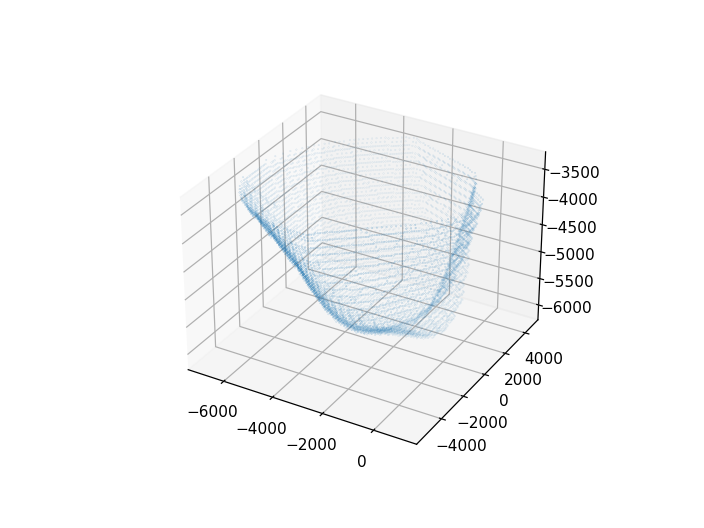

In [30]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Lania.sgx[:8000], Lania.sgy[:8000], Lania.sgz[:8000],s=0.01)

# Set an equal aspect ratio
#ax.set_aspect('equal')

plt.show()